<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network statistics </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>March 29, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. How big is a network?
<hr style="height:1px;border:none" />

## Number of nodes and edges
The size of a network can be easily summarized by the numbers of nodes and edges. Here, we call them $n$ and $m$. These quantities can be easily calculated by the **`len()`** function on **`.nodes()`** and **`.edges()`** methods associated with a graph. Here are two examples. 
  * **`G_karate`**: From **`karate.gml`**, Zachary's karate club network
  * **`G_netsci`**: From **`netscience.gml`**, network science co-authorship network

*Both data sets are available from [Mark Newman](http://www-personal.umich.edu/~mejn/netdata/)*

`<NetSize.py>`

In [1]:
import networkx as nx
import numpy as np

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship


# Network sizes
print('Network sizes')
print("Zachary's karate network, n:", len(G_karate.nodes()), sep='')
print("Zachary's karate network, m:", len(G_karate.edges()), sep='')

print("Network science co-authorship network, n:",
      len(G_netsci.nodes()), sep='')
print("Network science co-authorship network, m:",
      len(G_netsci.edges()), sep='')


Network sizes
Zachary's karate network, n:34
Zachary's karate network, m:78
Network science co-authorship network, n:1589
Network science co-authorship network, m:2742


## Giant component size

In a network data set, there is no guarantee that all nodes are connected as a single network. It is plausible that some nodes are disconnected from other nodes. Thus, in addition to network sizes, we can also examine the size of the giant component, or the number of nodes included in the largest connected component in the data set. Unfortunately there isn't a straightforward approach to calculate the giant component size in `networkx`. We will use a function **`connected_component_subgraphs`**, which returns a generator of connected subcomponents of the network data. We need to sort the components by **`sorted`** function, according to the number of nodes in these components (thus **`key = len`**), in the reverse order (**`reverse=True`**). We are only interested in the number of nodes in the giant component.

In [3]:
# Giant component sizes
print('Giant component sizes')
GC_karate = len(sorted(nx.connected_components(G_karate), key = len, reverse=True)[0])
GC_netsci = len(sorted(nx.connected_components(G_netsci), key = len, reverse=True)[0])
print("Zachary's karate network, GC:", GC_karate, sep='')
print("Network science co-authorship network, GC:",
      GC_netsci, sep='')

Giant component sizes
Zachary's karate network, GC:34
Network science co-authorship network, GC:379



Or it may be easier to interpret the relative giant component size, the giant component size relative to all available nodes. 

In [4]:
# Relative giant component sizes
rGC_karate = GC_karate/len(G_karate.nodes())
rGC_netsci = GC_netsci/len(G_netsci.nodes())
print('Relative giant component sizes')
print('Zachary\'s karate network, GC: %4.2f' % rGC_karate)
print("Network science co-authorship network, GC: %4.2f" % rGC_netsci)

Relative giant component sizes
Zachary's karate network, GC: 1.00
Network science co-authorship network, GC: 0.24


As you can see, the karate network includes all nodes as part of the giant component, whereas the network science network only includes 24% of all available nodes as part of the giant component.

### Exercise
1. **Network size table**. The following network data sets are available for you:
  * Les Miserable interaction network - **`lesmis.gml`**
  * NCAA college football network - **`football.gml`**
  * S&P500 stock price correlation network - **`SP500.gexf`**
  * Facebook sample network - **`facebook_combined.edgelist`**
  * Western US power grid - **`power.gml`**
  * High-res fMRI connectivity network - **`fMRI_HighRes.adjlist`**

And here is a code snippet to read all these data sets

In [5]:
import networkx as nx
import numpy as np

# loading network data
G_LesMis = nx.read_gml('lesmis.gml')  # Les Miserables
G_football = nx.read_gml('football.gml')  # Football network
G_SP500 = nx.read_gexf('SP500.gexf')  # S&P500
G_facebook = nx.read_edgelist('facebook_combined.edgelist')  # facebook
G_power = nx.read_gml('power.gml', label='id')  # power grid
G_fMRI = nx.read_adjlist('fMRI_HighRes.adjlist')  # fMRI network

Your goal is to fill in the numbers that are missing in the table below. *You can just post the numbers, not the code, on Canvas discussion*.

<table>
<tr>
<th style="text-align:left">Network</th>
<th style="text-align:center">Nodes</th>
<th style="text-align:center">Edges</th>
<th style="text-align:center">Relative GC size</th>
</tr>
<tr>
<td style="text-align:left">Les Miserables</td>
<td style="text-align:center"><b style="color:red;">(a)</b></td>
<td style="text-align:center">254</td>
<td style="text-align:center">1.00</tr>
</tr>
<tr>
<td style="text-align:left">NCAA football</td>
<td style="text-align:center">115</td>
<td style="text-align:center">613</td>
<td style="text-align:center"><b style="color:red;">(b)</b></tr>
</tr>
<tr>
<td style="text-align:left">S&P 500</td>
<td style="text-align:center">491</td>
<td style="text-align:center"><b style="color:red;">(c)</b></td>
<td style="text-align:center">1.00</tr>
</tr>
<tr>
<td style="text-align:left">Facebook</td>
<td style="text-align:center">4039</td>
<td style="text-align:center"><b style="color:red;">(d)</b></td>
<td style="text-align:center">1.00</tr>
</tr>
<tr>
<td style="text-align:left">Power grid</td>
<td style="text-align:center">4941</td>
<td style="text-align:center">6594</td>
<td style="text-align:center"><b style="color:red;">(e)</b></tr>
</tr>
<tr>
<td style="text-align:left">fMRI network</td>
<td style="text-align:center"><b style="color:red;">(f)</b></td>
<td style="text-align:center"><b style="color:red;">(g)</b></td>
<td style="text-align:center">1.00</tr>
</tr>
</table>

# 2. Describing connectivity
<hr style="height:1px;border:none" />


## Degree

The number of connections at each node, known as **node degree** or simply **degree**, is a good way to summarize how connected a particular node is. Let's take a look at some examples.

`<NodeDegree.py>`

In [1]:
%matplotlib inline

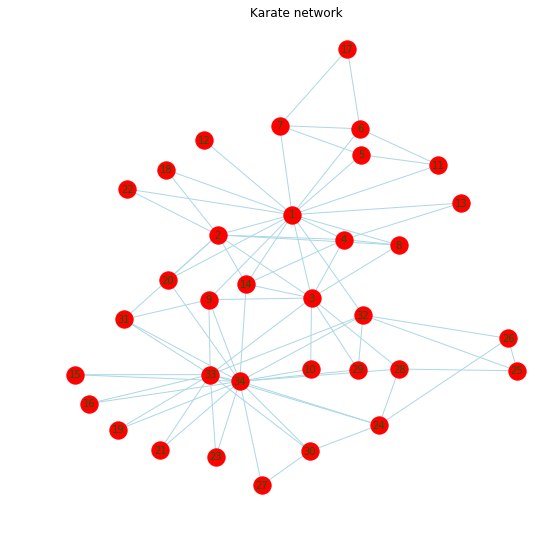

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship

# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Karate network')
plt.show()

The karate network is small enough so that you can count degrees manually. For example, the degree for node 17 is 2, and the degree for node 1 is 16. For each graph object, there is a method to determine the degree at each node, called **`degree`**.

In [3]:
# degree sequence
G_karate.degree()

DegreeView({1: 16, 2: 9, 3: 10, 4: 6, 5: 3, 6: 4, 7: 4, 8: 4, 9: 5, 10: 2, 11: 3, 12: 1, 13: 2, 14: 5, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 5, 25: 3, 26: 3, 27: 2, 28: 4, 29: 3, 30: 4, 31: 4, 32: 6, 33: 12, 34: 17})

In [ ]:
G_netsci.degree()

You can calculate the average node degree to describe how connected nodes are in each of these examples. First, you need to extract degrees.

In [5]:
# average node degree
k_karate = [d for n, d in G_karate.degree()]
k_netsci = [d for n, d in G_netsci.degree()]

Then calculate the means.

In [6]:
np.mean(k_karate)

4.588235294117647

In [7]:
np.mean(k_netsci)

3.4512271869100064

As you can see, just because the network is large, that doesn't mean the average degree is large. 

## Degree distribution

But these are average. As you can see from the earlier example, some nodes in a network may be more connected than other nodes. So, let's take a look at the distribution of degrees, to see how abundant or rare such high degree nodes are.

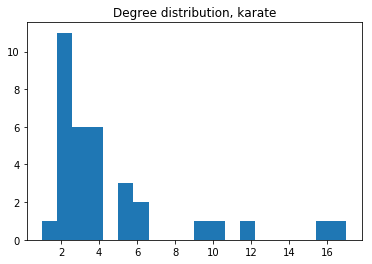

In [8]:
# degree distribution
plt.hist(k_karate,bins=20)
plt.title('Degree distribution, karate')
plt.show()

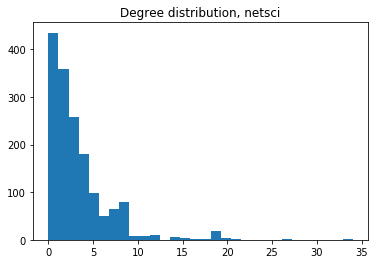

In [9]:
plt.hist(k_netsci,bins=30)
plt.title('Degree distribution, netsci')
plt.show()

In both cases, there are a small number of outliers with a large number of connections. Actually such high degree outliers, or **hubs**, are fairly common in a network. It is not unusual that a small number of such hubs in a network mediates a large proportion of connections in a network.

A degree distribution of a network often are highly skewed to the right, due to hubs. Thus, to examine node degree distributions, researchers often plot degrees on the X-axis, and the rank for the degrees on the Y-axis, on a log-log scale. Here is an example of such a plot for the netsci co-authorship network.

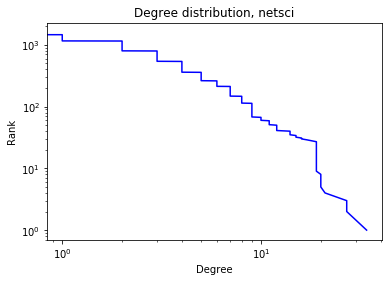

In [10]:
# degree distribution, against ranks, log-log
sk_netsci = sorted(k_netsci, reverse=True)
rank_netsci = np.arange(len(sk_netsci)) + 1
plt.plot(sk_netsci,rank_netsci,'b-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Rank')
plt.title('Degree distribution, netsci')
plt.show()

The degree distribution on the log-log scale may be a straight line. Such distributions are known as power-law distributions or scale-free distributions. In this particular example, the vast majority of the nodes in the network has only a few connections, while a small number of hubs have a few dozen connections. 


## Assortative & disassortative mix

In some networks, nodes with similar degrees are more likely connected (known as **assortative** networks). In other networks, nodes with dissimilar degrees are more likely connected (known as **disassortative** networks). To examine whether a network is assortative or disassortative, one can generate the degree mixing matrix with **`degree_mixing_matrix`** function. It produces a matrix of connection probabilities, with rows corresponding to the origin node degrees and the columns corresponding to the target node degrees. Here are examples from our example networks.

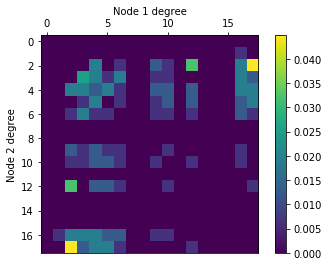

In [11]:
# Connection probability matrix
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
Rjk_karate = nx.degree_mixing_matrix(G_karate)
plt.imshow(Rjk_karate)
plt.xlabel('Node 1 degree')
plt.ylabel('Node 2 degree')
plt.colorbar()
plt.show()

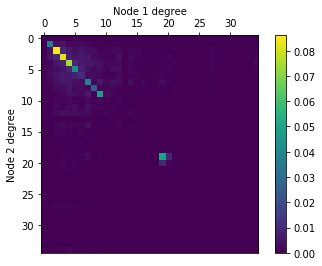

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
Rjk_netsci = nx.degree_mixing_matrix(G_netsci)
plt.imshow(Rjk_netsci)
plt.xlabel('Node 1 degree')
plt.ylabel('Node 2 degree')
plt.colorbar()
plt.show()

In the karate network, high degree nodes seem to be connected to low degree nodes (appears disassortative). On the other hand, in the netsci network, nodes with similar degrees are likely connected (appears assortative). To summarize the tendency between disassorative and assorative, one can calculate the **assortativity coefficient**. An assortativity coefficient is the correlation coefficient of node degrees of the origin and the target for all edges in a network. If the assortativity is positive and large, then the network is assortative. On the other hand, if the assortativity is highly negative, then the network is disassortative. There is **`degree_assortativity_coefficient`** function that can calculate the assortativity coefficient. For our example networks,


In [13]:
# assortativity coefficient
nx.degree_assortativity_coefficient(G_karate)

-0.47561309768461457

In [14]:
nx.degree_assortativity_coefficient(G_netsci)

0.4616224667525834

The karate network is disassorative, as expected, while the netsci network is assortative. 

### Exercise
1. **Average degrees**. Calculate the average degree for the 6 networks from the earlier exercise.
2. **Degree distribution, facebook**. Plot the degree distribution of the facebook network, on the log-log scale.
3. **Degree distribution, fMRI network**. Plot the degree distribution of the fMRI connectivity network, on the log-log scale.


# 3. Distance metrics
<hr style="height:1px;border:none" />


## Shortest path length

If you have ever played the game "Six degrees of Kevin Bacon," you may realize that, the separation between Kevin Bacon and any actor / actress in Hollywood is just a few steps.

<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/NetStat_BaconNumber.png?raw=true" alt="title pics"/>

<p style="text-align:center; font-size:12px; margin-top: 5px; margin-left:50px; margin-right:50px; margin-bottom:30px"> From the Oracle of Kevin Bacon </p>


Scientists play a similar game called the *Erdos number*. Here, the goal is to connect a scientist to Paul Erdos, a Hungarian mathematician and an prolific collaborator, by tracing co-authors. For example, the instructor's Erdos number is 4 (Hayasaka $\rightarrow$ Keith Worsley $\rightarrow$ Alan Evans $\rightarrow$ David Avis $\rightarrow$ Paul Erdos). 

These are two examples of the **shortest path length**, or the smallest number of steps (known as the **geodesic distance**) between two nodes in a network. Let's take a look at this in one of our example networks.

`<Distance.py>`

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship

First, a shortest path between nodes 31 and 32 in the karate network.

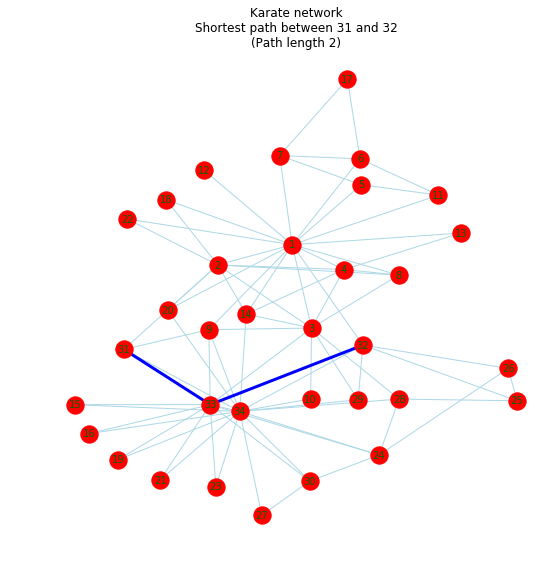

In [3]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
eList = [(31,33), (33,32)]
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_edges(G_karate, pos, edgelist=eList,
                       edge_color='blue', width=3.0)
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Karate network\nShortest path between 31 and 32\n(Path length 2)')
plt.show()

The shortest path length, or simply **path length**, is 2. It should be noted that the shortest path is not unique. Traversing node 34 would also yield the path length of 2. Here is a shortest path between nodes 17 and 21.

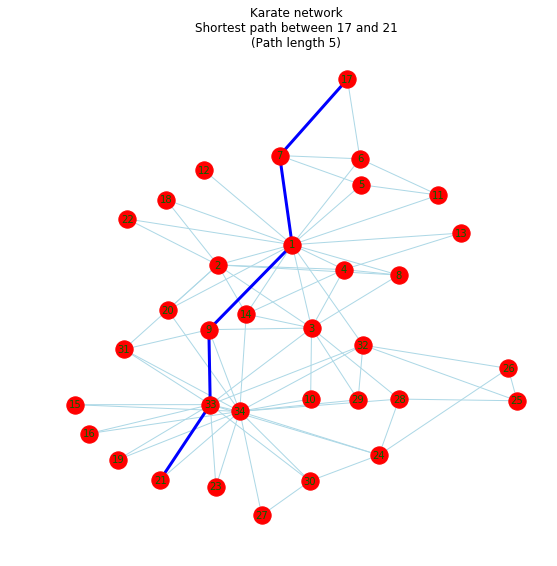

In [4]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
eList = [(17,7), (7,1), (1,9), (9,33), (33,21)]
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_edges(G_karate, pos, edgelist=eList,
                       edge_color='blue', width=3.0)
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Karate network\nShortest path between 17 and 21\n(Path length 5)')
plt.show()

In this case, the path length is 5. We can calculate the path length for all possible pairs of nodes in a network. Such average path length summarizes how integrated a network is. A shorter average path length means it is easy to traverse from any node to any other nodes to the network. On the other hand, a longer average path length means a less integrated network, where a large number of steps are required to traverse among nodes. There is a function called **`average_shortest_path_length`** that calculates the average shortest path length of a network.

In [5]:
# average shortest path lengths
nx.average_shortest_path_length(G_karate)

2.408199643493761

In [6]:
# the giant component only for the netsci network
G_netsci_GConly = max(nx.connected_component_subgraphs(G_netsci), key=len)
nx.average_shortest_path_length(G_netsci_GConly)

6.041867347935949

## Note on path lengths

There are somethings to remember when calculating path lengths.
  * *Calculating shortest path lengths can be computationally demanding*, especially for a large network. 
  * *Shortest path lengths can be calculated for connected components only*. No path (i.e., no way to get there), no path length.

## Diameter

Another metric to summarize the ease of traversing a network is called the **diameter** of a network. The diameter is the maximum shortest path lengths in the network. Or the longest distance to traverse two farthest nodes. There is **`diameter`** function to calculate the diameter.

In [20]:
# diameter
nx.diameter(G_karate)

5

In [21]:
nx.diameter(G_netsci_GConly)  # giant component only for netsci network

17

### Exercise
1. **Path lengths**. Calculate the average shortest path length for the 6 example networks we examined earlier.

# 4. Clustering
<hr style="height:1px;border:none" />

In a social network, say a person has two friends. Chances are, those two friends are also friends with each other. This can be described in our karate network example as:

`<Clustering.py>`

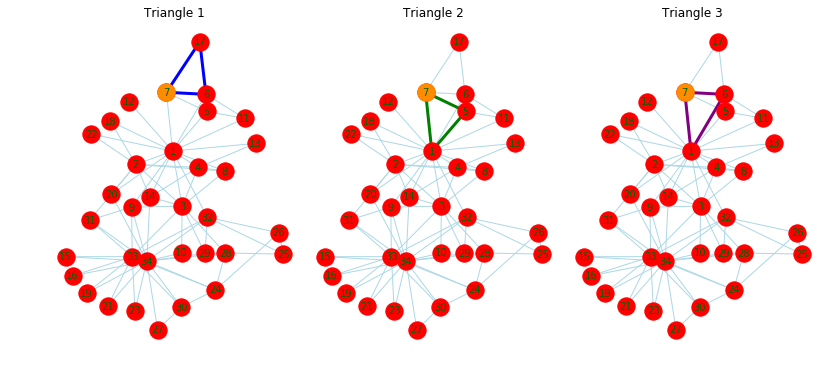

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship


# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[12,6])
eListB = [(7,17), (17,6),(6,7)]
eListG = [(7,1), (1,5), (5,7)]
eListP = [(7,1), (1,6), (6,7)]
plt.subplot(131)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_nodes(G_karate, pos, nodelist=[7], node_color='DarkOrange')
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_edges(G_karate, pos, edgelist=eListB,
                       edge_color='blue', width=3.0)
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Triangle 1')
plt.axis('off')

plt.subplot(132)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_nodes(G_karate, pos, nodelist=[7], node_color='DarkOrange')
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_edges(G_karate, pos, edgelist=eListG,
                       edge_color='green', width=3.0)
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Triangle 2')
plt.axis('off')

plt.subplot(133)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_nodes(G_karate, pos, nodelist=[7], node_color='DarkOrange')
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_edges(G_karate, pos, edgelist=eListP,
                       edge_color='purple', width=3.0)
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Triangle 3')
plt.axis('off')

plt.subplots_adjust(hspace=0.00, wspace=0.00, left=0.05, right=0.95)
plt.show()

Node 7 has 4 connections. Among those 4 connections, 3 of them are connected as well, forming triangles. This is an example of interconnections in a network, known as **clustering**. Clustering can be summarized by the probability that one's friends are also friends with each other, known as the **clustering coefficient**. This can be calculated by the number of triangles (3 in this case) divided by all possible triangles (6 in this case). Thus the clustering coefficient for node 7 is 0.5. You can calculate the clustering coefficients for all nodes by the **`clustering`** function.

In [23]:
# Clustering coefficient at each node
nx.clustering(G_karate)

{1: 0.15,
 2: 0.3333333333333333,
 3: 0.24444444444444444,
 4: 0.6666666666666666,
 5: 0.6666666666666666,
 6: 0.5,
 7: 0.5,
 8: 1.0,
 9: 0.5,
 10: 0,
 11: 0.6666666666666666,
 12: 0,
 13: 1.0,
 14: 0.6,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 0.3333333333333333,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 0.4,
 25: 0.3333333333333333,
 26: 0.3333333333333333,
 27: 1.0,
 28: 0.16666666666666666,
 29: 0.3333333333333333,
 30: 0.6666666666666666,
 31: 0.5,
 32: 0.2,
 33: 0.19696969696969696,
 34: 0.11029411764705882}

In [ ]:
nx.clustering(G_netsci)

You can calculate the average of clustering coefficients for all nodes in a network, by the **`average_clustering`** function. The average clustering summarize how inter connected nodes are. A higher average clustering coefficient means there are many interconnections among nodes, providing redundancy in the network. Most networks have high clustering (>>0). 

In [25]:
# Average clustering coefficient for the network
nx.average_clustering(G_karate)

0.5706384782076823

In [26]:
nx.average_clustering(G_netsci)

0.6377905695067801

As you can see, just because a network is large, that doesn't mean the average clustering is small.

### Exercise
1. **Average clustering**. Calculate the average clustering for the 6 example networks we examined earlier.

# 5. Random deletions vs. targeted attacks
<hr style="height:1px;border:none" />

Redundant connections resulting from high clustering can keep a network from falling apart if some random nodes are deleted from the network. This is important because friends move away in a social network, a server fails in a computer network, and an airport experiences a delay in an air transportation network. Such random catastrophes affecting a small number of random nodes do not affect the integrity of the network as a whole. To demonstrate this, we perform an experiment of random node deletion in a network.

`<NodeDeletion.py>`

In [8]:
import networkx as nx
import numpy as np
from random import seed,randint
import matplotlib.pyplot as plt


# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship


def print_netStats(G):
    '''
    priting out network statistics

    Input parameter:
        G:    A graph object
    
    Returns:
        None

    The following stats are printed for G: 
        GC:    Relative giant component size
        L:     Average shortest path lengths (for giant component only)
        D:     Diamter (for giant component only)
        C:     Average clustering coefficient
    '''
    GConly = max(nx.connected_component_subgraphs(G), key=len)
    GC = len(GConly)/len(G)
    L = nx.average_shortest_path_length(GConly)
    D = nx.diameter(GConly)
    C = nx.average_clustering(G)
    print('GC size: %5.3f' % GC, end='')
    print('\t\tL : %5.2f' % L, end='')
    print('\t\tD : %2d' % D, end='')
    print('\t\tC : %4.2f' % C)

    
# initializing the random number generator
seed(2)


Now, let's remove 5 random nodes from the karate network. After each deletion, we print out network metrics to see how the network is holding up.

In [9]:
#### removing nodes randomly (karate)
G_karate_randdel = G_karate.copy()
print('Before node removal')
print_netStats(G_karate_randdel)
# for loop for node removal
for iRemove in range(5):
    nodeOut = randint(1,len(G_karate))
    while nodeOut not in G_karate_randdel:
        nodeOut = randint(1,len(G_karate))
    print('Removing node ', nodeOut)
    G_karate_randdel.remove_node(nodeOut)
    print_netStats(G_karate_randdel)

Before node removal
GC size: 1.000		L :  2.41		D :  5		C : 0.57
Removing node  4
GC size: 1.000		L :  2.42		D :  5		C : 0.53
Removing node  6
GC size: 1.000		L :  2.41		D :  5		C : 0.51
Removing node  24
GC size: 1.000		L :  2.41		D :  5		C : 0.52
Removing node  11
GC size: 1.000		L :  2.39		D :  5		C : 0.52
Removing node  20
GC size: 1.000		L :  2.42		D :  5		C : 0.53


The path length L and clustering coefficient C alters slightly, but the giant component is still in tact. We can also perform random deletion on the netsci network. In this case, we delete 15 nodes (about 1% of all nodes).

In [18]:
#### removing nodes randomly (netsci)
G_netsci_randdel = G_netsci.copy()
nodeList = list(G_netsci.nodes())
print('Before node removal')
print_netStats(G_netsci_randdel)
# for loop for node removal
for iRemove in range(15):
    nodeOut = nodeList[randint(1,len(G_netsci))]
    while nodeOut not in G_netsci_randdel:
        nodeOut = nodeList[randint(1,len(G_netsci))]
    print('Removing node ', nodeOut)
    G_netsci_randdel.remove_node(nodeOut)
    print_netStats(G_netsci_randdel)

Before node removal
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  BARYAM, Y
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  ANDERSON, C
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  WALKENSTEIN, J
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  HUDSON, J
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  BOTSTEIN, D
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  PENNA, T
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  KEELING, M
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  ENNIS, J
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  FRISTON, K
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  FIEDLER, M
GC size: 0.239		L :  6.04		D : 17		C : 0.63
Removing node  ADAMIC, L
GC size: 0.240		L :  6.04		D : 17		C : 0.63
Removing node  ILMONIEMI, R
GC size: 0.239		L :  6.02		D : 17		C : 0.63
Removing node  WORMALD, N
GC size: 0.239		L :  6.02		D : 17		C : 0.63
Removing node  VALLADARES

As you can see, networks are resilient against random removal (failures or departures) of nodes. However, if deletions are not random, but targeted hub nodes, that's a different story. To demonstrate this, we will find high degree nodes by sorting nodes by node degrees.

In [19]:
# finding the node with high degree (karate)
k_karate = [d for n, d in G_karate.degree()]
node_karate = [n for n, d in G_karate.degree()]
sortedNodes = sorted(zip(node_karate, k_karate), key=lambda x: x[1],
                     reverse=True)
snode_karate, sk_karate = zip(*sortedNodes)

These are the top 5 highest degree nodes in the karate network and their respective degrees.

In [20]:
snode_karate[:5]

(34, 1, 33, 3, 2)

In [21]:
sk_karate[:5]

(17, 16, 12, 10, 9)

In [22]:
# finding the node with high degree (netsci)
k_netsci = [d for n, d in G_netsci.degree()]
node_netsci = [n for n, d in G_netsci.degree()]
sortedNodes = sorted(zip(node_netsci, k_netsci), key=lambda x: x[1],
                     reverse=True)
snode_netsci, sk_netsci = zip(*sortedNodes)

These are the top 15 highest degree nodes in the netsci network and their respective degrees.

In [17]:
snode_netsci[:15]

('BARABASI, A',
 'JEONG, H',
 'NEWMAN, M',
 'OLTVAI, Z',
 'YOUNG, M',
 'CAGNEY, G',
 'MANSFIELD, T',
 'UETZ, P',
 'LOCKSHON, D',
 'CONOVER, D',
 'NARAYAN, V',
 'YANG, M',
 'ROTHBERG, J',
 'KNIGHT, J',
 'KALBFLEISCH, T')

In [10]:
sk_netsci[:15]

(34, 27, 27, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19)

Now, let's remove these nodes in the order of node degree. First, the karate network.

In [23]:
#### removing highly connected nodes first (karate)
G_karate_attack = G_karate.copy()
print('Before node removal')
print_netStats(G_karate_attack)
# for loop for node removal
for iRemove in range(5):
    nodeOut = snode_karate[iRemove]
    print('Removing node ', nodeOut)
    G_karate_attack.remove_node(nodeOut)
    print_netStats(G_karate_attack)

Before node removal
GC size: 1.000		L :  2.41		D :  5		C : 0.57
Removing node  34
GC size: 1.000		L :  2.60		D :  6		C : 0.39
Removing node  1
GC size: 0.812		L :  2.59		D :  5		C : 0.22
Removing node  33
GC size: 0.645		L :  2.81		D :  6		C : 0.18
Removing node  3
GC size: 0.333		L :  2.02		D :  4		C : 0.17
Removing node  2
GC size: 0.276		L :  2.21		D :  5		C : 0.09


As you can see, the network crumbles with the diminishing giant component (GC) size as nodes are deleted. Although the path length (L) seems to be preserved, the clustering coefficient (C) becomes small as well.

Now the netsci network.

In [24]:
#### removing highly connected nodes first (netsci)
G_netsci_attack = G_netsci.copy()
print('Before node removal')
print_netStats(G_netsci_attack)
# for loop for node removal
for iRemove in range(15):
    nodeOut = snode_netsci[iRemove]
    print('Removing node ', nodeOut)
    G_netsci_attack.remove_node(nodeOut)
    print_netStats(G_netsci_attack)

Before node removal
GC size: 0.239		L :  6.04		D : 17		C : 0.64
Removing node  BARABASI, A
GC size: 0.228		L :  6.07		D : 17		C : 0.64
Removing node  JEONG, H
GC size: 0.227		L :  6.47		D : 18		C : 0.63
Removing node  NEWMAN, M
GC size: 0.219		L :  7.95		D : 18		C : 0.63
Removing node  OLTVAI, Z
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  YOUNG, M
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  CAGNEY, G
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  MANSFIELD, T
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  UETZ, P
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  LOCKSHON, D
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  CONOVER, D
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  NARAYAN, V
GC size: 0.215		L :  8.35		D : 19		C : 0.63
Removing node  YANG, M
GC size: 0.216		L :  8.35		D : 19		C : 0.63
Removing node  ROTHBERG, J
GC size: 0.216		L :  8.35		D : 19		C : 0.63
Removing node  KNIGHT, J
GC size: 

In this case, although the GC size does not reduce dramatically, L and the diameter D becomes larger, indicating that it is harder to traverse the network. 

Here is a visual representation of what happens in random deletions and targeted attacks.

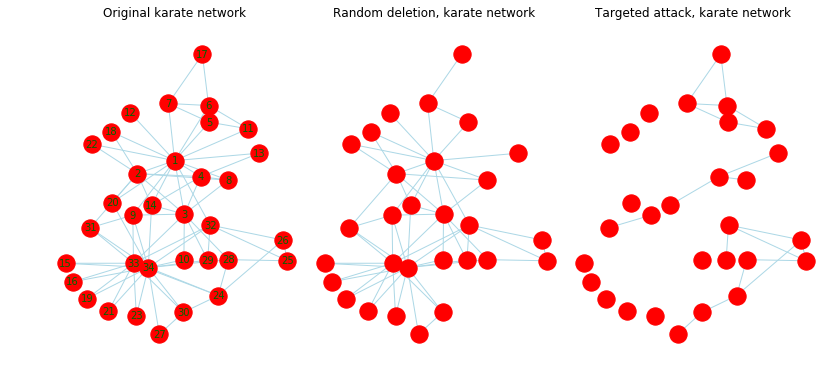

In [25]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[12,6])
plt.subplot(131)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Original karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])


plt.subplot(132)
nodeList = G_karate_randdel.nodes()
edgeList = G_karate_randdel.edges()
nx.draw_networkx_nodes(G_karate, pos, nodelist=nodeList)
nx.draw_networkx_edges(G_karate, pos, edgelist=edgeList,
                       edge_color='lightblue')
plt.title('Random deletion, karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])


plt.subplot(133)
nodeList = G_karate_attack.nodes()
edgeList = G_karate_attack.edges()
nx.draw_networkx_nodes(G_karate, pos, nodelist=nodeList)
nx.draw_networkx_edges(G_karate, pos, edgelist=edgeList,
                       edge_color='lightblue')
plt.title('Targeted attack, karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

plt.subplots_adjust(hspace=0.00, wspace=0.00, left=0.05, right=0.95)
plt.show()